In [2]:
%matplotlib inline
import random
import torch as t
from torch.distributions.multinomial import Multinomial
from matplotlib import pyplot as plt

In [15]:
t.arange(1500)

tensor([   0,    1,    2,  ..., 1497, 1498, 1499])

In [16]:
## Frequency of heads (tails) as n increases? 

num_tosses = t.arange(1500)
p_heads = []
p_tails = []
for toss in num_tosses:
    heads = sum([random.random() > 0.5 for _ in range(toss)])
    tails = toss - heads
    p_heads.append(heads/toss)
    p_tails.append(tails/toss)
    print(f"P(head) = {heads/toss}, P(tail) = {tails/toss} for n = {toss}")

P(head) = nan, P(tail) = nan for n = 0
P(head) = 0.0, P(tail) = 1.0 for n = 1
P(head) = 0.0, P(tail) = 1.0 for n = 2
P(head) = 0.0, P(tail) = 1.0 for n = 3
P(head) = 0.5, P(tail) = 0.5 for n = 4
P(head) = 0.6000000238418579, P(tail) = 0.4000000059604645 for n = 5
P(head) = 0.5, P(tail) = 0.5 for n = 6
P(head) = 0.4285714626312256, P(tail) = 0.5714285969734192 for n = 7
P(head) = 0.125, P(tail) = 0.875 for n = 8
P(head) = 0.6666666865348816, P(tail) = 0.3333333432674408 for n = 9
P(head) = 0.5, P(tail) = 0.5 for n = 10
P(head) = 0.4545454680919647, P(tail) = 0.5454545617103577 for n = 11
P(head) = 0.5833333730697632, P(tail) = 0.4166666567325592 for n = 12
P(head) = 0.46153849363327026, P(tail) = 0.5384615659713745 for n = 13
P(head) = 0.5, P(tail) = 0.5 for n = 14
P(head) = 0.6000000238418579, P(tail) = 0.4000000059604645 for n = 15
P(head) = 0.3125, P(tail) = 0.6875 for n = 16
P(head) = 0.5882353186607361, P(tail) = 0.4117647111415863 for n = 17
P(head) = 0.5, P(tail) = 0.5 for n = 18

In [38]:
def set_axes(axes, xlabel = None, ylabel = None, xlim = None, ylim = None, xscale ='linear', yscale = 'linear', legend = False):
    """Set axes attributes for matplotlib"""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xlim(xlim), axes.set_ylim(ylim)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    if legend:
        axes.legend(legend)
    axes.grid()

def plot(X, Y = None, xlabel = None, ylabel = None, xlim = None, ylim = None, xscale ='linear', yscale = 'linear', legend = False,lines=('-', 'm--','g-.','r:'),figsize = (4.5,3.5), axes = None):
    _, axes = plt.subplots(figsize = figsize)
    ## X and Y should be input as a list
    for x, y, line in zip(X,Y,lines):
        axes.plot(x,y,line)
    set_axes(axes, xlabel= xlabel, ylabel= ylabel, xlim=xlim, ylim=ylim, xscale=xscale, yscale=yscale, legend=legend)



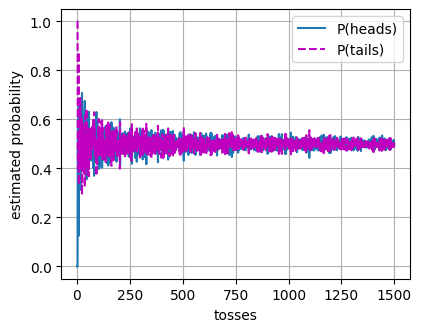

In [39]:
plot([num_tosses, num_tosses], [p_heads, p_tails], xlabel='tosses', ylabel='estimated probability', legend=['P(heads)', 'P(tails)'])

tensor([45., 55.]) tensor([499., 501.])


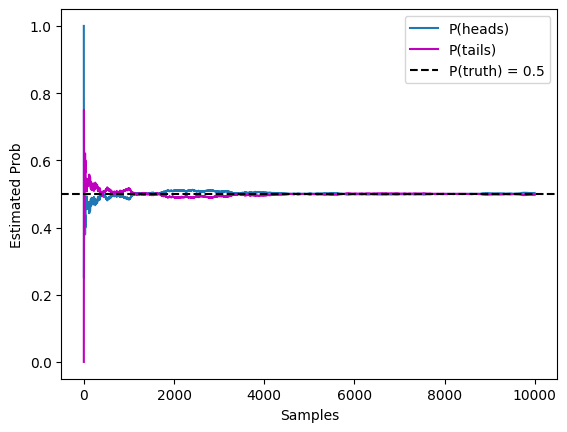

In [53]:
# Can instead use multinomial with args = (num draws, [probs for each possible outcome])

fair_coin = t.tensor([0.5, 0.5])
print(Multinomial(100, fair_coin).sample(),Multinomial(1000, fair_coin).sample())


## sample 10000 times, flipping once each time a fair coin
counts = Multinomial(1, fair_coin).sample((10000,))
cum_counts = counts.cumsum(dim = 0)
estimates = cum_counts / (cum_counts.sum(dim = 1, keepdims= True))
estimates = estimates.numpy() #un-torchify to plot
#x_ax = t.arange(1,10001)
#plot([x_ax, x_ax], [estimates[:,0], estimates[:,1]], xlabel='counts', ylabel='Estimated Prob', legend = ['P(heads), P(tails)'])
_, axes = plt.subplots()
axes.plot(estimates[:,0],label = "P(heads)")
axes.plot(estimates[:,1], 'm-', label = "P(tails)")
axes.set_xlabel("Samples")
axes.set_ylabel("Estimated Prob")
axes.axhline(y = 0.5, color = "black", linestyle = 'dashed', label = 'P(truth) = 0.5')
axes.legend();
## Can see when it converges! 


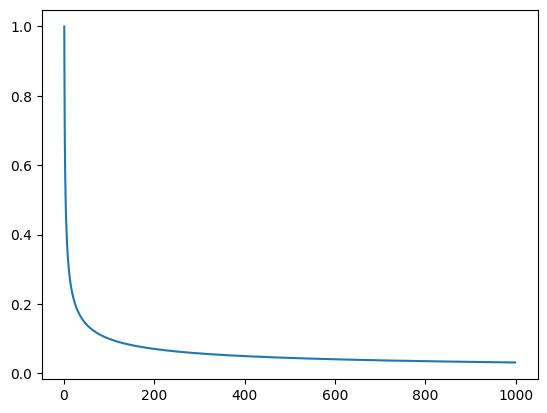

In [63]:
x_ax = t.arange(1,1000)
plt.plot(x_ax, 1/t.sqrt(x_ax))

In [140]:
k = 4
sum(random.choice([0,1]) for _ in range(k))

1

In [128]:
### Calculating the variance of finding 1 H after n tosses of a fair coin? 
n = t.arange(1,50)
density = n/(2**n)
E_H = density.cumsum(axis = 0)
# density_2 = n**2/(2**n)
# var_H = (density_2.cumsum(axis = 0) - E_H**2)
# plt.plot(E_H*(1-E_H))
# plt.plot(E_H)
#E_H, var_H, E_H*(1-E_H)
n,density

(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
         19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
         37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 tensor([5.0000e-01, 5.0000e-01, 3.7500e-01, 2.5000e-01, 1.5625e-01, 9.3750e-02,
         5.4688e-02, 3.1250e-02, 1.7578e-02, 9.7656e-03, 5.3711e-03, 2.9297e-03,
         1.5869e-03, 8.5449e-04, 4.5776e-04, 2.4414e-04, 1.2970e-04, 6.8665e-05,
         3.6240e-05, 1.9073e-05, 1.0014e-05, 5.2452e-06, 2.7418e-06, 1.4305e-06,
         7.4506e-07, 3.8743e-07, 2.0117e-07, 1.0431e-07, 5.4017e-08, 2.7940e-08,
         1.4435e-08, 7.4506e-09, 3.8417e-09, 1.9791e-09, 1.0186e-09, 5.2387e-10,
         2.6921e-10, 1.3824e-10, 7.0941e-11, 3.6380e-11, 1.8645e-11, 9.5497e-12,
         4.8885e-12, 2.5011e-12, 1.2790e-12, 6.5370e-13, 3.3396e-13, 1.7053e-13,
         8.7041e-14]))

Continuous Random Variables 

tensor(99.9897)


tensor(0.8082)

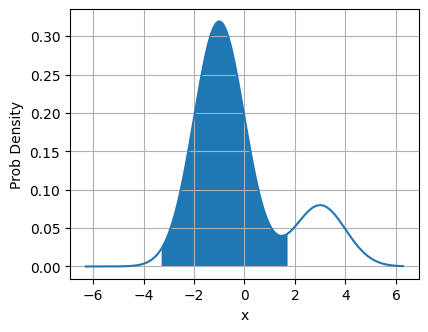

In [126]:
## Probability Density plotted for a random variable x

t.pi,  2*t.acos(t.zeros(1)).item()

x = t.arange(-2*t.pi,2*t.pi,0.01)
norm_c = 1/(t.sqrt(2*t.tensor(t.pi)))

p = 0.2*norm_c*t.exp(-(x - 3)**2 / 2) + 0.8*norm_c*t.exp(-(x + 1)**2 / 2)
print(p.sum())
plot([x],[p], xlabel = 'x', ylabel = 'Prob Density')
## The CDF is the integral of a probability density up to some point (filled in blue)
plt.fill_between(x.tolist()[300:800], p.tolist()[300:800])
## approximate probability in this region 
eps = 0.01
t.sum(eps * p[300:800])

/var/folders/yj/gj5_5c_j1399_7h47zvzddtc0000gn/T/ipykernel_33227/144473449.py:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axes.stem([a-2, a, a+2], [p,1-2*p, p ], use_line_collection=True)


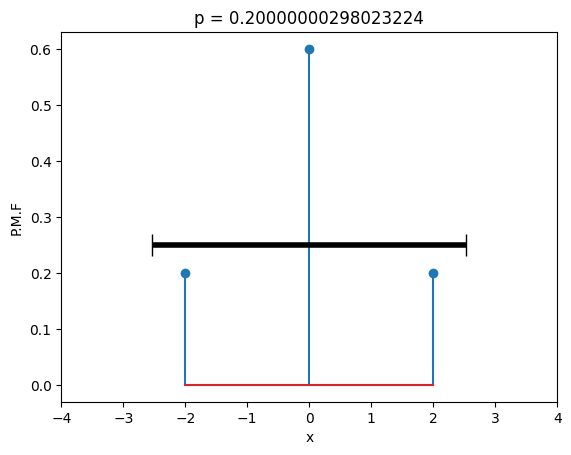

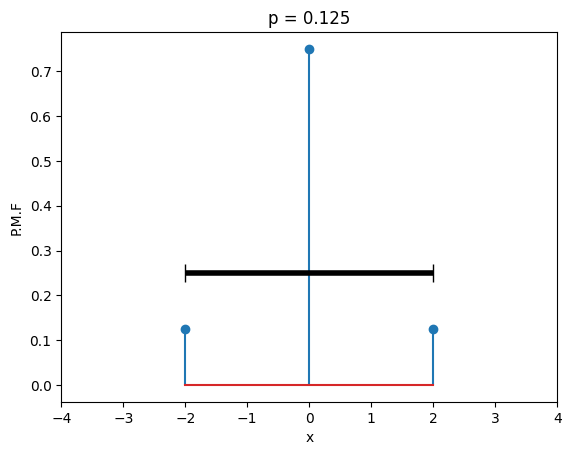

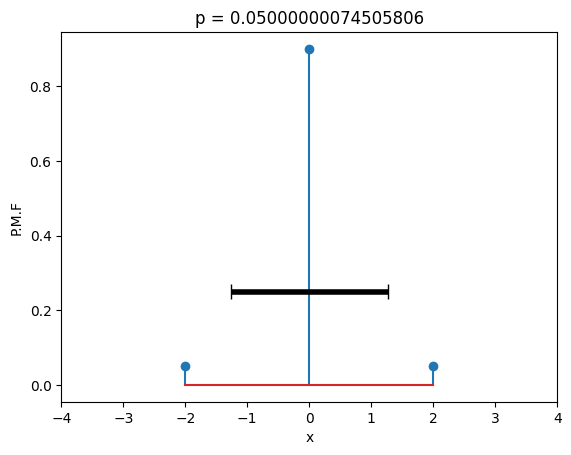

In [155]:
## plots three example probabilities from tutorial as vertical lines,
#the black horizontal bar is the interval given by the chebyshev inequality 

def plot_chebyshev(a,p):
    _, axes = plt.subplots()
    axes.stem([a-2, a, a+2], [p,1-2*p, p ], use_line_collection=True)
    plt.xlim([-4,4])
    plt.xlabel('x')
    plt.ylabel('P.M.F')
    plt.hlines(0.25, a-4*t.sqrt(2*p),a+4*t.sqrt(2*p), 'black', lw=4)
    plt.vlines(a - 4 * t.sqrt(2 * p), 0.23, 0.27, 'black', lw=1)
    plt.vlines(a + 4 * torch.sqrt(2 * p), 0.23, 0.27, 'black', lw=1)
    plt.title(f"p = {p}")

# p > 1/8, inequality holds
plot_chebyshev(0.0, t.tensor(0.2))
# p = 1/8, inequality holds exactly
plot_chebyshev(0.0, t.tensor(1/8))
# p < 1/8, inequality doesn't hold
plot_chebyshev(0.0, t.tensor(0.05))

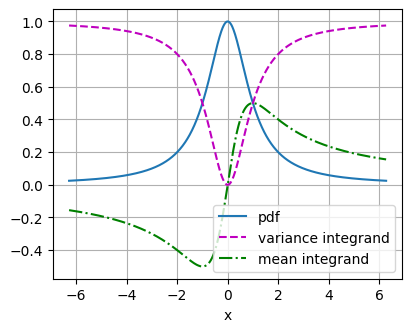

In [161]:
## continuous distribution - Cauchy pdf
#### distributions with "heavy tails" are sometimes ill defined

x = t.arange(-2*t.pi, 2*t.pi, 0.01)
p = 1 / (1+x**2)
## variance is not well-defined (it has infinite value)
var_dens = x**2/(1+x**2)
## neither is the mean
mean_dens = x/(1+x**2)
plot([x,x,x],[p,var_dens,mean_dens],xlabel='x', legend = ['pdf','variance integrand', 'mean integrand'])

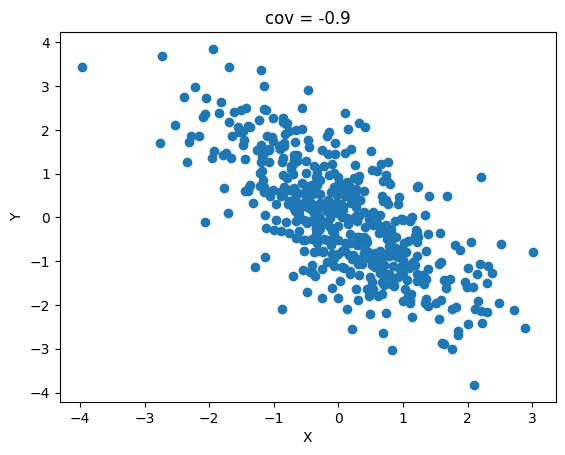

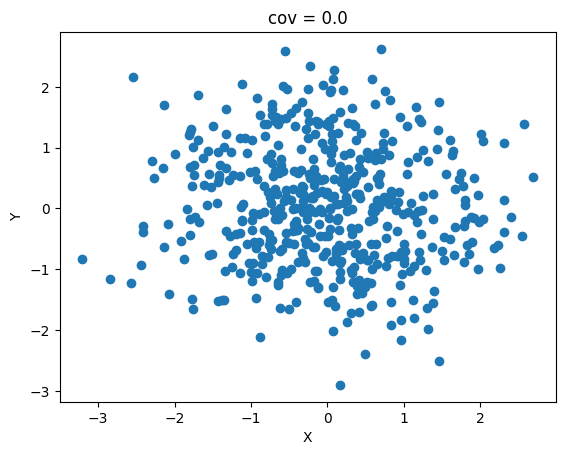

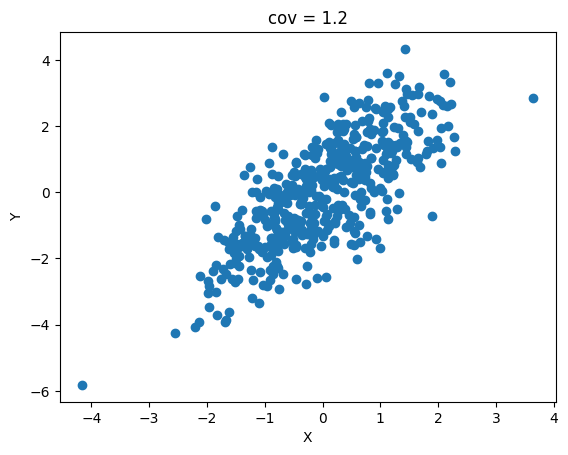

In [174]:
## plotting a few random variables adjustable covariance 
covs = [-0.9, 0.0, 1.2]
for cov in covs:
    X = t.randn(500)
    Y = cov* X + t.randn(500)
    plt.subplots()
    plt.scatter(X.numpy(), Y.numpy())
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f"cov = {cov}")


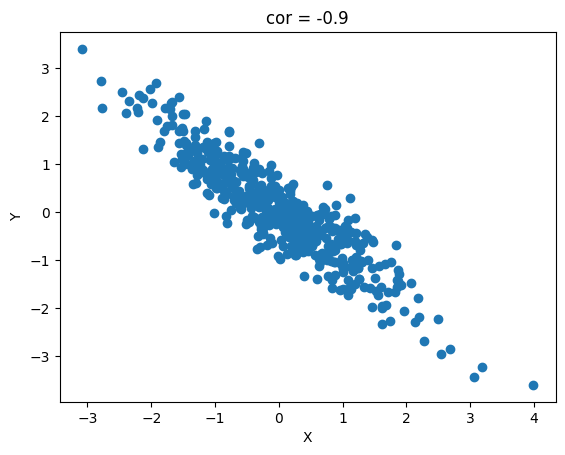

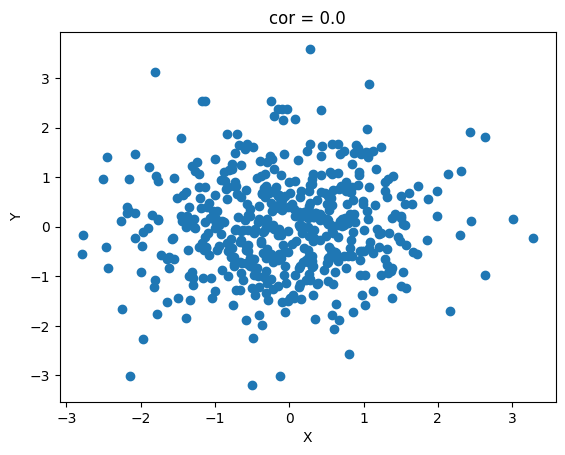

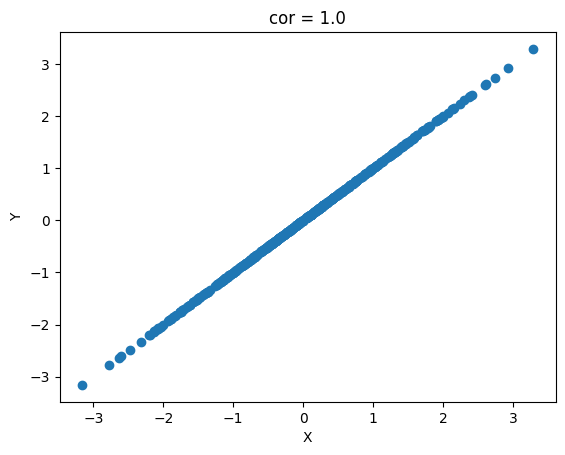

In [215]:
## Even better than covariance is correlation, which is unitless! 

cors = [-0.9, 0.0, 1.0]
for cor in cors:
    X = t.randn(500)
    Y = cor * X + t.sqrt(t.tensor(1)-cor**2)*t.randn(500)
    plt.subplots()
    plt.scatter(X.numpy(), Y.numpy())
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f"cor = {cor}")

In [214]:
1/16

0.0625

(tensor([1.0000, 0.2500]), 0.5)

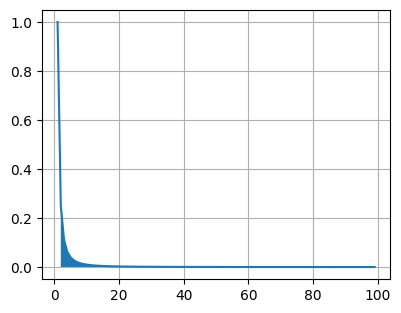

In [213]:

x = t.arange(1,100)
p_dens = 1/x**2
plot([x],[p_dens])
plt.fill_between(x.tolist()[1:], p_dens.tolist()[1:])
p_dens[0:2], 1/2
